In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(
    "rohanrao/formula-1-world-championship-1950-2020")

print("Path to dataset files:", path)

Path to dataset files: /home/dawid/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/24


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
circuits = pd.read_csv(path + "/circuits.csv")

constructor_results = pd.read_csv(path + "/constructor_results.csv")
constructor_standings = pd.read_csv(path + "/constructor_standings.csv")
constructors = pd.read_csv(path + "/constructors.csv")

driver_standings = pd.read_csv(path + "/driver_standings.csv")
drivers = pd.read_csv(path + "/drivers.csv")

lap_times = pd.read_csv(path + "/lap_times.csv")

pit_stops = pd.read_csv(path + "/pit_stops.csv")

qualifying = pd.read_csv(path + "/qualifying.csv")

races = pd.read_csv(path + "/races.csv")
race_results = pd.read_csv(path + "/results.csv")

seasons = pd.read_csv(path + "/results.csv")

sprint_results = pd.read_csv(path + "/sprint_results.csv")

status = pd.read_csv(path + "/status.csv")

In [91]:
races.sort_values("year", ascending=False).head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1111,1131,2024,11,70,Austrian Grand Prix,2024-06-30,13:00:00,https://en.wikipedia.org/wiki/2024_Austrian_Gr...,2024-06-28,10:30:00,2024-06-28,14:30:00,\N,\N,2024-06-29,14:00:00,2024-06-29,10:00:00
1112,1132,2024,12,9,British Grand Prix,2024-07-07,14:00:00,https://en.wikipedia.org/wiki/2024_British_Gra...,2024-07-05,11:30:00,2024-07-05,15:00:00,2024-07-06,10:30:00,2024-07-06,14:00:00,\N,\N
1113,1133,2024,13,11,Hungarian Grand Prix,2024-07-21,13:00:00,https://en.wikipedia.org/wiki/2024_Hungarian_G...,2024-07-19,11:30:00,2024-07-19,15:00:00,2024-07-20,10:30:00,2024-07-20,14:00:00,\N,\N
1114,1134,2024,14,13,Belgian Grand Prix,2024-07-28,13:00:00,https://en.wikipedia.org/wiki/2024_Belgian_Gra...,2024-07-26,11:30:00,2024-07-26,15:00:00,2024-07-27,10:30:00,2024-07-27,14:00:00,\N,\N
1115,1135,2024,15,39,Dutch Grand Prix,2024-08-25,13:00:00,https://en.wikipedia.org/wiki/2024_Dutch_Grand...,2024-08-23,10:30:00,2024-08-23,14:00:00,2024-08-24,09:30:00,2024-08-24,13:00:00,\N,\N


In [16]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [17]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [18]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [74]:
race_results["position"] = race_results["position"].replace(to_replace=r"\N",
                                                            value="0")
race_results["position"] = race_results["position"].astype("int")

In [19]:
wins = race_results[race_results["position"] == 1]["driverId"].value_counts()
wins = wins.reindex(drivers["driverId"], fill_value=0)
wins.info()

<class 'pandas.core.series.Series'>
Index: 861 entries, 1 to 862
Series name: count
Non-Null Count  Dtype
--------------  -----
861 non-null    int64
dtypes: int64(1)
memory usage: 13.5 KB


In [33]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10494 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10494 non-null  int64 
 1   raceId         10494 non-null  int64 
 2   driverId       10494 non-null  int64 
 3   constructorId  10494 non-null  int64 
 4   number         10494 non-null  int64 
 5   position       10494 non-null  int64 
 6   q1             10494 non-null  object
 7   q2             10472 non-null  object
 8   q3             10448 non-null  object
dtypes: int64(6), object(3)
memory usage: 738.0+ KB


In [38]:
qualifying_wins = qualifying[qualifying["position"] == 1][
    "driverId"].value_counts()
qualifying_wins = qualifying_wins.reindex(drivers["driverId"], fill_value=0)
qualifying_wins.info()

<class 'pandas.core.series.Series'>
Index: 861 entries, 1 to 862
Series name: count
Non-Null Count  Dtype
--------------  -----
861 non-null    int64
dtypes: int64(1)
memory usage: 13.5 KB


In [67]:
driver_data = drivers[["driverId", "forename", "surname"]].merge(wins,
                                                                 on="driverId",
                                                                 how="left").merge(
    qualifying_wins, on="driverId", how="left")
driver_data = driver_data.rename(
    columns={"driverId": "driver_id", "count_x": "race_wins",
             "count_y": "quali_wins"})

driver_data = driver_data.assign(driver_name=driver_data["forename"] + " " +
                                             driver_data["surname"])
driver_data.drop(["forename", "surname"], axis=1)
driver_data = driver_data[
    ["driver_id", "driver_name", "race_wins", "quali_wins"]]
driver_data

,driver_id,driver_name,race_wins,quali_wins
0,1,Lewis Hamilton,105,107
1,2,Nick Heidfeld,0,1
2,3,Nico Rosberg,23,30
3,4,Fernando Alonso,32,23
4,5,Heikki Kovalainen,1,1
...,...,...,...,...
856,858,Logan Sargeant,0,0
857,859,Liam Lawson,0,0
858,860,Oliver Bearman,0,0
859,861,Franco Colapinto,0,0


<Axes: xlabel='driver_name', ylabel='race_wins'>

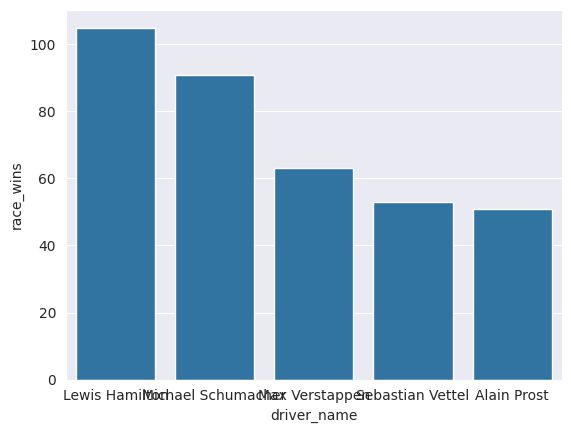

In [69]:
sns.barplot(driver_data.sort_values(by="race_wins", ascending=False).head(),
            x="driver_name", y="race_wins")

<Axes: xlabel='driver_name', ylabel='quali_wins'>

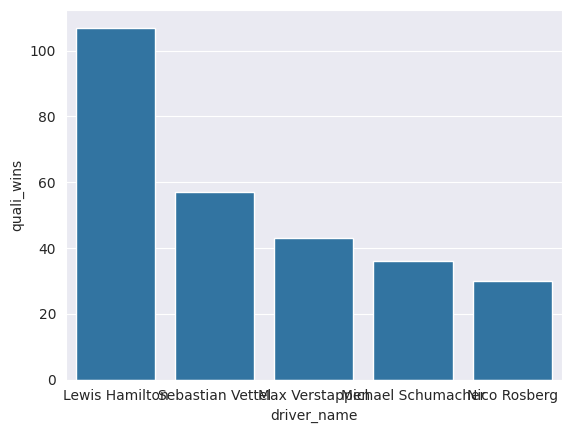

In [61]:
sns.barplot(driver_data.sort_values(by="quali_wins", ascending=False).head(),
            x="driver_name", y="quali_wins")

In [86]:
podiums = race_results[race_results["position"] <= 3]["driverId"].value_counts()
podiums = podiums.reindex(drivers["driverId"], fill_value=0)
podiums = podiums.rename("driver_id")
podiums.head()

driverId
1    232
2     59
3     86
4    176
5     25
Name: driver_id, dtype: int64

In [79]:
driver_data = driver_data.merge(podiums, on="driver")

,driver_id,driver_name,race_wins,quali_wins
0,1,Lewis Hamilton,105,107
1,2,Nick Heidfeld,0,1
2,3,Nico Rosberg,23,30
3,4,Fernando Alonso,32,23
4,5,Heikki Kovalainen,1,1
...,...,...,...,...
856,858,Logan Sargeant,0,0
857,859,Liam Lawson,0,0
858,860,Oliver Bearman,0,0
859,861,Franco Colapinto,0,0
